## Problem Statement

#### To predict the Sale price of houses based on their various features such as location, number of bedrooms and bathrooms, square footage, lot size, and other relevant factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer #importing necessary libraries 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HPtrain.csv') # reading the data

### EDA

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1459, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.isnull().sum().sum()

6960

In [7]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # only showing columns which have null values

LotFrontage      259
Alley           1368
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1178
MiscFeature     1405
dtype: int64


In [8]:
df.describe() # we can find outliers here itself by checking difference between median and mean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

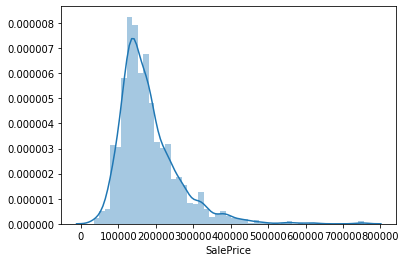



skewness: 1.881760
kurtosis: 6.529882


In [10]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(df.SalePrice)
plt.show()
print('\n')
print("skewness: %f" % df['SalePrice'].skew())
print("kurtosis: %f" % df ['SalePrice'].kurt())

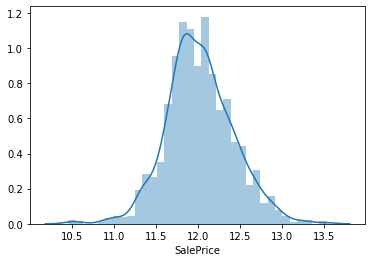

skewness: 0.120706
kurtosis: 0.807294


In [11]:
# log transformations used to transform skewed data to approximately confirm to normality.

# log transform the target 
df["SalePrice"] = np.log1p(df["SalePrice"])

#Kernel Density plot
sns.distplot(df.SalePrice);
plt.show()

print("skewness: %f" % df['SalePrice'].skew())
print("kurtosis: %f" % df ['SalePrice'].kurt())

In [12]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

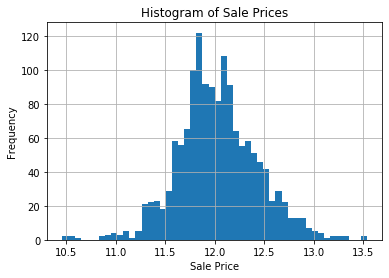

In [13]:
df['SalePrice'].hist(bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')
plt.show() 
# Frequency - count of observations in each bin.
# This will help you identify if the target variable is normally distributed or if it has any outliers.

In [14]:
df = df.drop(['Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1) 
# Dropping unnecessary columns along with columns having more than 80% null values

In [15]:
df.shape

(1459, 66)

In [16]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # counting number of null values in each column

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtExposure     38
Electrical        1
FireplaceQu     689
GarageType       81
GarageYrBlt      81
GarageQual       81
GarageCond       81
dtype: int64


In [17]:
num=df._get_numeric_data() 
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,12.429220


In [18]:
num.fillna(method='ffill', inplace=True)

In [19]:
num_cols=pd.DataFrame((num),columns=num.columns)
num_cols.isnull().sum().sum()

0

In [20]:
# normalizing the numerical columns
num_cols = (num_cols - num_cols.min()) / (num_cols.max() - num_cols.min())
num_cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.581428
1,0.000686,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.536316
2,0.001372,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.604026
3,0.002058,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.451868
4,0.002743,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.640475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.997257,0.000000,0.140411,0.028979,0.666667,0.500,0.956522,0.916667,0.000000,0.072644,...,0.282087,0.000000,0.206581,0.000000,0.0,0.0,0.0,0.00000,0.818182,0.542529
1455,0.997942,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.524453
1456,0.998628,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.583760
1457,0.999314,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,0.661265


In [21]:
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head() # Taking categorical columns

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [22]:
cat.fillna(df.mode().iloc[0], inplace=True)

In [23]:
cat_data=pd.DataFrame((cat),columns=cat.columns)
cat_data.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [24]:
cat_data.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleCondition    0
dtype: int64

In [25]:
cat_data.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtExposure      4
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
Functional        7
FireplaceQu       5
GarageType        6
GarageQual        5
GarageCond        5
PavedDrive        3
SaleCondition     6
dtype: int64

In [26]:
cat_data["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [27]:
cat_data["Functional"].value_counts()

Typ     1359
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [28]:
print(cat_data.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


In [29]:
# onehot encoding scratch code 
# Loop through each categorical column in the DataFrame
for col in cat_data.columns:
    # Create a set of unique values for the column
    unique_vals = set(cat_data[col])
    # Create a dictionary to map each unique value to an integer
    val_to_int = {val: i for i, val in enumerate(unique_vals)}
    # Create a list to store the one-hot encoded values for each row
    encoded_col = []
    # Loop through each value in the column and append its one-hot encoded representation to the list
    for val in cat_data[col]:
        one_hot = [0] * len(unique_vals)
        one_hot[val_to_int[val]] = 1
        encoded_col.append(one_hot)
    # Convert the list of one-hot encoded values to a DataFrame and append it to the original DataFrame
    encoded_df = pd.DataFrame(encoded_col, columns=[col + '_' + str(val) for val in unique_vals])
    cat_data = pd.concat([cat_data, encoded_df], axis=1)
    # Drop the original categorical column from the DataFrame
    cat_data = cat_data.drop(col, axis=1)


In [30]:
cat_data.head()

,MSZoning_RM,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_C (all),Street_Pave,Street_Grvl,LotShape_IR3,LotShape_Reg,LotShape_IR2,...,GarageCond_TA,PavedDrive_Y,PavedDrive_N,PavedDrive_P,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Partial
0,0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [31]:
#dummification for categorical columns
# g_d=pd.get_dummies(cat_data)

In [32]:
# g_d.head()

In [33]:
cat_data.isnull().sum().sum()

0

Text(0, 0.5, 'SalePrice')

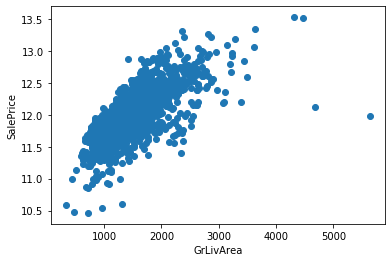

In [34]:
import seaborn as sns
plt.scatter(num['GrLivArea'], num['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
#This will help you identify if there is a linear relationship between these two variables.

Text(0, 0.5, 'Sale Price')

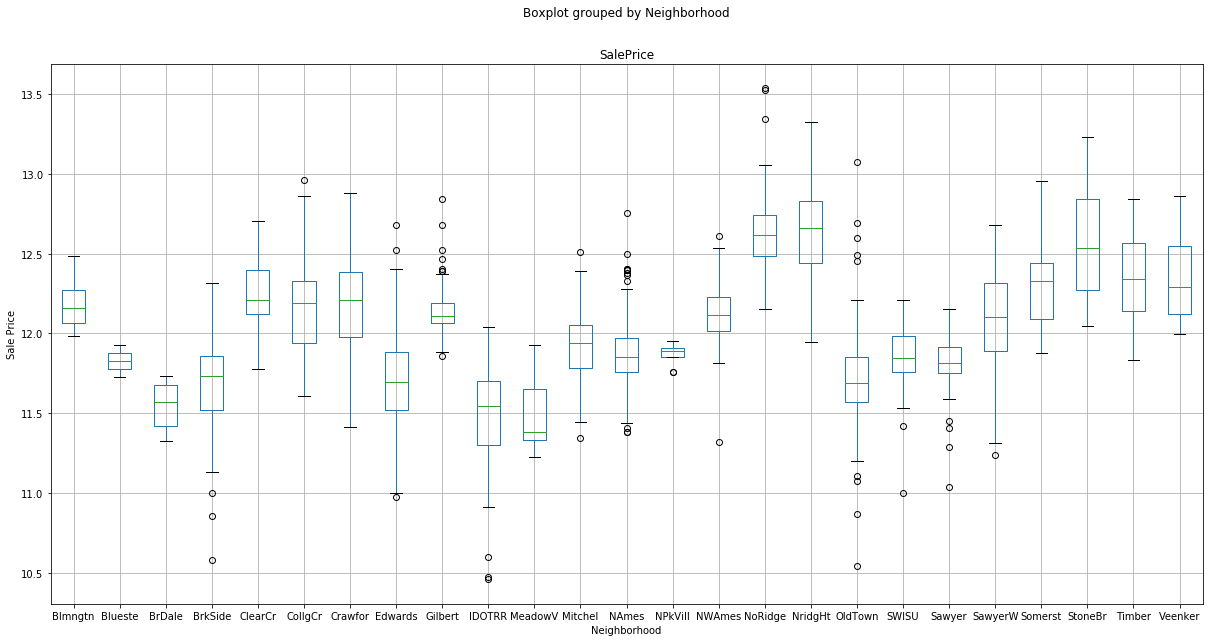

In [35]:
df.boxplot(column='SalePrice', by='Neighborhood', figsize=(20, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price') #This will help you identify if there are any significant differences in sale prices between neighborhoods.

Text(0, 0.5, 'Sale Price')

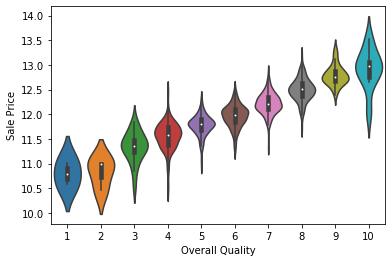

In [36]:
sns.violinplot(x='OverallQual', y='SalePrice', data=num, scale='width')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price') #shows density at given y value

In [37]:
num_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.581428
1,0.000686,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.536316
2,0.001372,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.604026
3,0.002058,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.451868
4,0.002743,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.640475


In [38]:
cat_data.head()

,MSZoning_RM,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_C (all),Street_Pave,Street_Grvl,LotShape_IR3,LotShape_Reg,LotShape_IR2,...,GarageCond_TA,PavedDrive_Y,PavedDrive_N,PavedDrive_P,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Partial
0,0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [39]:
# concating the numerical column and updated categorical column 
final_df=pd.concat([num_cols,cat_data],axis=1)
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_Y,PavedDrive_N,PavedDrive_P,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,1,1,0,0,0,0,1,0,0,0
1,0.000686,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,1,1,0,0,0,0,1,0,0,0
2,0.001372,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,1,1,0,0,0,0,1,0,0,0
3,0.002058,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,1,1,0,0,0,1,0,0,0,0
4,0.002743,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,1,1,0,0,0,0,1,0,0,0


In [40]:
final_df.shape

(1459, 224)

In [41]:
final_df['SalePrice']

0       0.581428
1       0.536316
2       0.604026
3       0.451868
4       0.640475
          ...   
1454    0.542529
1455    0.524453
1456    0.583760
1457    0.661265
1458    0.456768
Name: SalePrice, Length: 1459, dtype: float64

In [42]:
null_counts = final_df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [43]:
final_df.isnull().sum().sum()

0

In [44]:
# Reset the index
final_df = final_df.reset_index(drop=True)

## Train_Test_split

In [45]:
#from sklearn.model_selection import train_test_split, cross_val_score

In [46]:
# X = final_df.drop(['SalePrice'],axis=1)
# y = final_df['SalePrice']

In [47]:
# X.shape

In [48]:
# final_df.shape

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building For Train Data

In [50]:
import numpy as np
import pandas as pd

class DecisionTreeRegressor: #which implements a decision tree regression algorithm
    def __init__(self, max_depth=2): # initialize the object's attributes
        self.max_depth = max_depth
    
    def fit(self, X, y): #X and y, which represent the input features and target values
        self.tree = self.build_tree(X, y, depth=0) # build_tree method to construct the decision tree using the input data and the specified max_depth
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape # assigns samples and features to rows and columns 
        
        if depth == self.max_depth or n_samples == 5: #whether the maximum depth of the tree has been reached 
            return np.mean(y) #the method returns the mean of the target values, which will be used as the prediction for the leaf node.
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False) #selects two random features from the input data without replacement and calls
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs) #find_best_split method to determine the best feature and threshold to split the data on
        
        if best_threshold is None: #it means that if no good split was found then return mean of target column
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold #indicate which samples in the input data should go to the left or right child node
        right_idxs = X[:, best_feature] >= best_threshold #based on whether their values for the best feature are less than or greater than or equal to the best threshold.
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1) # recursively calls the build_tree method on the left and right subsets of the input data
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1) #passing in the corresponding input and target values and increasing the depth by 1.
        
        return (best_feature, best_threshold, left_tree, right_tree)
        # the method returns a tuple containing the best feature, best threshold, and the left and right child nodes as subtrees
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf') #creates a floating-point value that represents positive infinity
        best_feature = None #because it is used to keep track of the best found so far to split the data on
        best_threshold = None
        
        for feature in feature_idxs: # code loops over each feature in feature_idxs
            thresholds = np.unique(X[:, feature]) # loops over each unique threshold value for that feature
            
            for threshold in thresholds: # boolean index arrays are created to indicate which samples in the input data should go to which side
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0: #checks whether there are any samples in either the left or right child node
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score: # if split_score is better than best score,feature,.. found, then it is updated otherwise previous best is kept
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold # returns best values
    
    def split_score(self, y, y_left, y_right): # calculates the score for splitting the y target variable into two subgroups y_left and y_right
        p_left = len(y_left) / len(y) # calculates the proportion of instances in y_left compared to the total number of instances in y
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right) # calculates the score for splitting y into y_left and y_right
        # np.var() function calculates the variance of an array
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [51]:
# Split data into features and target variableX
X = final_df.drop(['SalePrice'],axis=1)
y = final_df['SalePrice']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
rfr = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)

In [53]:
rfr.fit(X, y)

In [54]:
y_pred = rfr.predict(X_test)

In [55]:
y_pred

array([0.51680741, 0.51805699, 0.51066218, 0.51805699, 0.50843093,
       0.5214225 , 0.52678095, 0.51430132, 0.54977214, 0.51299972,
       0.5226778 , 0.53140176, 0.53140176, 0.53140176, 0.53140176,
       0.5226778 , 0.53140176, 0.5226778 , 0.51066218, 0.5378024 ,
       0.5226778 , 0.53140176, 0.51805699, 0.5226778 , 0.5378024 ,
       0.53140176, 0.5378024 , 0.5226778 , 0.5226778 , 0.52907844,
       0.5226778 , 0.5433715 , 0.53140176, 0.51528299, 0.51805699,
       0.53140176, 0.5226778 , 0.53140176, 0.52445763, 0.51528299,
       0.5226778 , 0.53140176, 0.51680741, 0.5433715 , 0.54977214,
       0.52907844, 0.50381012, 0.5226778 , 0.54977214, 0.53140176,
       0.5378024 , 0.5121866 , 0.5214225 , 0.5226778 , 0.5226778 ,
       0.5378024 , 0.52907844, 0.5226778 , 0.5226778 , 0.5226778 ,
       0.5121866 , 0.5378024 , 0.54977214, 0.5378024 , 0.5226778 ,
       0.52445763, 0.51528299, 0.54977214, 0.5226778 , 0.51502186,
       0.51040105, 0.51805699, 0.5226778 , 0.5245372 , 0.52267

In [56]:
mse = np.mean((y_pred - y_test)**2) # MSE = (1/n) * Σ(y_i - ŷ_i)^2
mae = np.mean(np.abs(y_pred - y_test)) # MAE = (1/n) * Σ|y_i - ŷ_i|
r2 = 1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print('MSE:', mse)
print('MAE:', mae)
print('r2_score:', r2)

MSE: 0.016656182149210424
MAE: 0.09925832729460256
r2_score: 0.08848842923982136


In [57]:
def mean_squared_error(self, X, y):
  y_pred = self.predict(X)
  mse = np.mean((y - y_pred)**2)
  return mse
    
def mean_absolute_error(self, X, y):
  y_pred = self.predict(X)
  mae = np.mean(np.abs(y - y_pred))
  return mae

def r_squared(self, X, y):
  y_pred = self.predict(X)
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((X - np.mean(y))**2)
  r2 = 1 - ss_res/ss_tot
  return r2
        
print(f"r2 Score: {r2}")
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")


r2 Score: 0.08848842923982136
mean_absolute_error: 0.09925832729460256
mean_squared_error: 0.016656182149210424


TUNING TECHNIQUES

In [58]:
import numpy as np
import itertools

class DecisionTreeRegressor:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples == 5:
            return np.mean(y)
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False)
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs)
        
        if best_threshold is None:
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def split_score(self, y, y_left, y_right):
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right)
        
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)

class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5, random_state=42):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        self.random_state = random_state
        
    def set_params(self, **params):
        if 'n_trees' in params:
            self.n_trees = params['n_trees']
        if 'max_depth' in params:
            self.max_depth = params['max_depth']
        if 'subsample_size' in params:
            self.subsample_size = params['subsample_size']
        if 'random_state' in params:
            self.random_state = params['random_state']
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            self.trees.append(tree)
        
    
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)
    
    def r2_score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_res / ss_tot)
        return r2
    
    def score(self,X,y):
        return self.r2_score(X,y)
                            
class KFold:
    def __init__(self, n_splits=5, shuffle=True, random_state=42):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state    
    def set_params(self, n_trees=15, max_depth=2, subsample_size=0.5):
        if n_trees is not None:
            self.n_trees = n_trees
        if max_depth is not None:
            self.max_depth = max_depth
        if subsample_size is not None:
            self.subsample_size = subsample_size
            
    def split(self, X):
        np.random.seed(self.random_state)
        n_samples = len(X)
        indices = np.arange(n_samples)
        if self.shuffle:
            np.random.shuffle(indices)
        fold_sizes = (n_samples // self.n_splits) * np.ones(self.n_splits, dtype=np.int)
        fold_sizes[:n_samples % self.n_splits] += 1
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            yield indices[start:stop]
            current = stop
            
class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
        
    def _get_param_combinations(self):
        keys, values = zip(*self.param_grid.items())
        param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
        return param_combinations   
    
    def _get_cv_scores(self, X, y):
        fold_sizes = np.linspace(0, len(X), num=self.cv+1, dtype='int')
        scores = []
        for i in range(self.cv-1):  # Changed range from self.cv to self.cv-1
            start = fold_sizes[i]
            end = fold_sizes[i+1]
            X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
            y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
            X_test = X.iloc[start:end]
            y_test = y.iloc[start:end]
            self.estimator.fit(X_train, y_train)
            scores.append(self.estimator.score(X_test, y_test))
        return scores
    
    def fit(self, X, y):
        grid_scores = []      
        for params in self._get_param_combinations():
            self.estimator.set_params(**params)
            scores = self._get_cv_scores(X, y)
            mean_score = np.mean(scores)
            grid_scores.append((params, scores, mean_score))
            
        self.grid_scores_ = grid_scores
        self.best_params_ , self.best_scores_ , self.best_mean_score_ = max(grid_scores,key=lambda x:x[2])    


In [59]:
# Split data into features and target variableX
X = final_df.drop(['SalePrice'],axis=1)
y = final_df['SalePrice']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
# Define hyperparameters to search over
param_grid = {
    'n_trees': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'subsample_size': [0.5, 0.7, 0.9]
}

In [61]:
rfr = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)

In [62]:
# Create instance of GridSearchCV with RandomForestRegressor as estimator
grid_search = GridSearchCV(rfr, param_grid,cv=5)

In [63]:
# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)

In [64]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'n_trees': 50, 'max_depth': 5, 'subsample_size': 0.9}


In [65]:
rfr = RandomForestRegressor(n_trees=grid_search.best_params_['n_trees'], max_depth=grid_search.best_params_['max_depth'],subsample_size=grid_search.best_params_['subsample_size']) 

In [66]:
rfr.fit(X_train, y_train) 

In [67]:
y_pred1 = rfr.predict(X_test)

In [68]:
y_pred1

array([0.52190357, 0.51651838, 0.5134584 , 0.52164978, 0.51175304,
       0.51917872, 0.51843656, 0.52164978, 0.53160298, 0.51944313,
       0.51629085, 0.5212438 , 0.52240767, 0.52013559, 0.52319449,
       0.51741024, 0.52319267, 0.51495044, 0.51495044, 0.52403818,
       0.52018008, 0.52472703, 0.51859136, 0.51468139, 0.52307985,
       0.51890586, 0.52307985, 0.51918999, 0.52624483, 0.51701466,
       0.52285628, 0.52649797, 0.52760618, 0.51260347, 0.51200618,
       0.5216912 , 0.51617147, 0.52553965, 0.51950412, 0.51543003,
       0.52142419, 0.52148573, 0.50955706, 0.52075136, 0.52075136,
       0.51895249, 0.52006983, 0.51104786, 0.52237907, 0.52553965,
       0.51693459, 0.51506326, 0.52200528, 0.52120043, 0.51493709,
       0.51917727, 0.51989623, 0.51977608, 0.51756993, 0.51109969,
       0.51147965, 0.52307985, 0.52237907, 0.52083461, 0.51969474,
       0.51918999, 0.51741024, 0.52589451, 0.52664785, 0.52968216,
       0.52018542, 0.52104633, 0.51788135, 0.51751437, 0.52018

In [69]:
mse = np.mean((y_pred1 - y_test)**2)
mae = np.mean(np.abs(y_pred1 - y_test))
r2 = 1 - np.sum((y_pred1 - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print('MSE:', mse)
print('MAE:', mae)
print('r2_score:', r2)

MSE: 0.017912719146521032
MAE: 0.10277897729437979
r2_score: 0.019724290983133996


In [70]:
def mean_squared_error(self, X, y):
  y_pred = self.predict(X)
  mse = np.mean((y - y_pred)**2)
  return mse
    
def mean_absolute_error(self, X, y):
  y_pred = self.predict(X)
  mae = np.mean(np.abs(y - y_pred))
  return mae

def r_squared(self, X, y):
  y_pred = self.predict(X)
  ss_res = np.sum((y - y_pred)**2)
  ss_tot = np.sum((X - np.mean(y))**2)
  r2 = 1 - ss_res/ss_tot
  return r2
        
print(f"r2 Score: {r2}")
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")


r2 Score: 0.019724290983133996
mean_absolute_error: 0.10277897729437979
mean_squared_error: 0.017912719146521032


## Pseudo Code

Initialize an empty list to store the decision trees.

For i in range(n_estimators): 
         a. Draw a random sample of the input features. 
         b. Create a decision tree using the random sample of features with max_depth, 
              min_samples_split and min samples leaf. 
        c. Append the decision tree to the list of decision trees.


Initialize an empty array of size (n_samples, n_estimators) to store the predictions of each decision tree.

For i in range(n_estimators): 
         a. Use the i-th decision tree to predict the target variable y. 
         b. Store the predicted values in the i-th column of the array of predictions.

Compute the average of the predictions across all decision trees to obtain the final prediction.

Return the final prediction y_pred. 


## Kaggle link for dataset

https://www.kaggle.com/code/emrearslan123/house-price-prediction/data